In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.mixture import GaussianMixture

In [2]:
#Get the dataset
data = np.load('../solutions/formationchannels.npy')

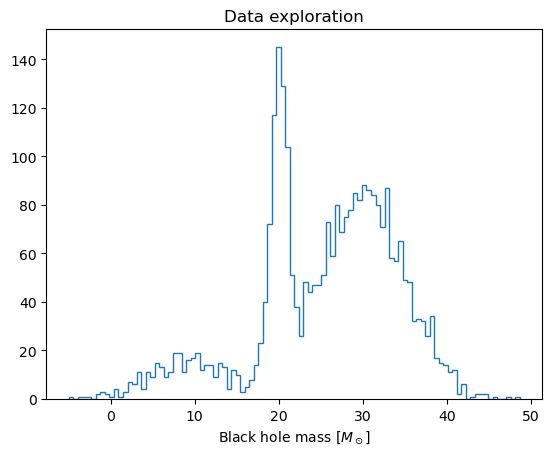

In [98]:
#Get a first idea of the data
plt.hist(data, bins=100, histtype = 'step')[2]
plt.xlabel(r'Black hole mass $[M_\odot]$')
plt.title(r'Data exploration')
plt.show()

In [24]:
#Fit GaussianMixture models with 1-10 components
Ns = np.arange(1, 10)
models = [GaussianMixture(N).fit(data) for N in Ns]

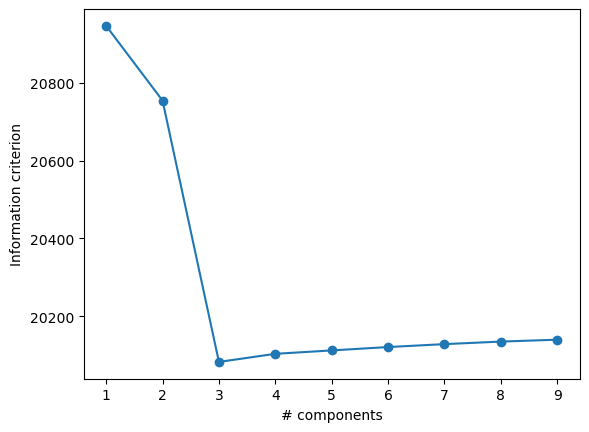

In [ ]:
#Compute and plot the Akaike Information Criterion (AIC)
AIC = [m.aic(data) for m in models]

plt.plot(Ns, AIC)
plt.scatter(Ns, AIC)

plt.xlabel(r'# components')
plt.ylabel(r'Information criterion')
plt.show()

In [44]:
print(r'The AIC is minimised for %i components' % Ns[np.argmin(AIC)])

The AIC is minimised for 3 components


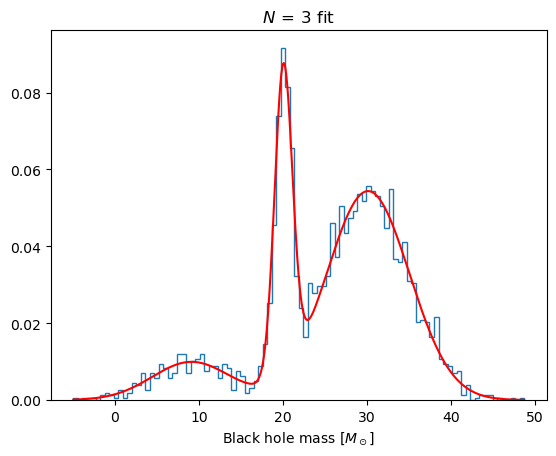

In [ ]:
#Let's see the 3 components case
best_mod = models[np.argmin(AIC)]
grid = np.linspace(min(data)[0], max(data)[0], 1000)
logprob = best_mod.score_samples(grid.reshape(-1, 1))
pdf = np.exp(logprob)

plt.hist(data, bins = 100, density = True, histtype = 'step')[2]
plt.plot(grid, pdf, 'r')
plt.xlabel(r'Black hole mass $[M_\odot]$')
plt.title(r'$N\,=\,3$ fit')
plt.show()

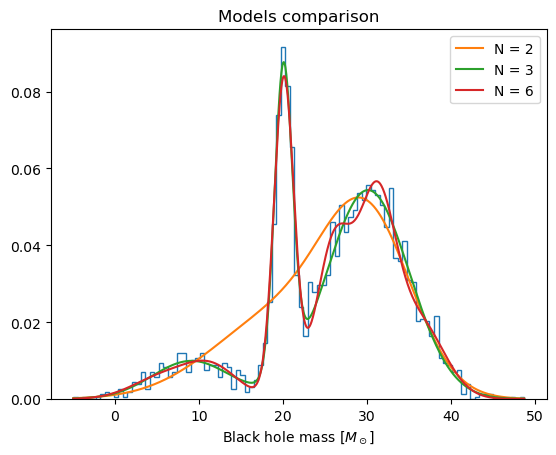

In [96]:
#Compare different models
plt.hist(data, bins = 100, density = True, histtype = 'step')

for index in np.argmin(AIC)+np.array([-1, 0, 3]):
    logprob = models[index].score_samples(grid.reshape(-1, 1))
    plt.plot(grid, np.exp(logprob), label = 'N = '+str(Ns[index]))

plt.xlabel(r'Black hole mass $[M_\odot]$')
plt.title(r'Models comparison')
plt.legend()
plt.show()